In [1]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from normalize import *
from pca_plots import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ROSMAP_PATH = 'ROSMAP_clinical.csv'
CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ROSMAP_data = pd.read_csv(ROSMAP_PATH)
ct_counts_metadata: ad.AnnData = ad.read_h5ad(CT_COUNTS_META_PATH)

ROSMAP_data = ROSMAP_data.convert_dtypes()
ct_counts_metadata.obs = ct_counts_metadata.obs.convert_dtypes()

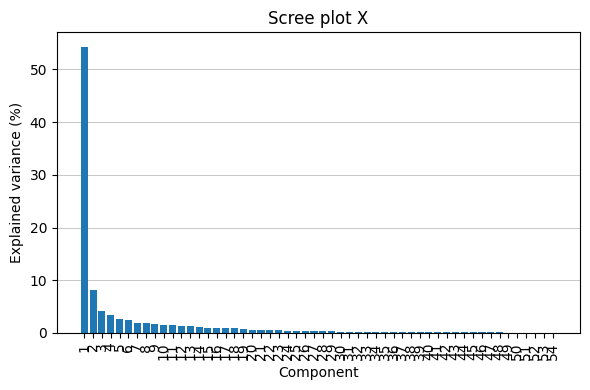

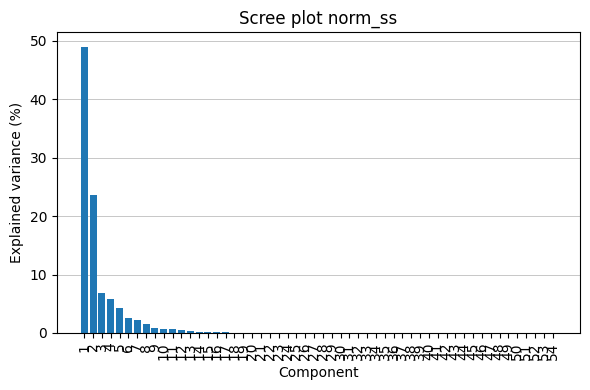

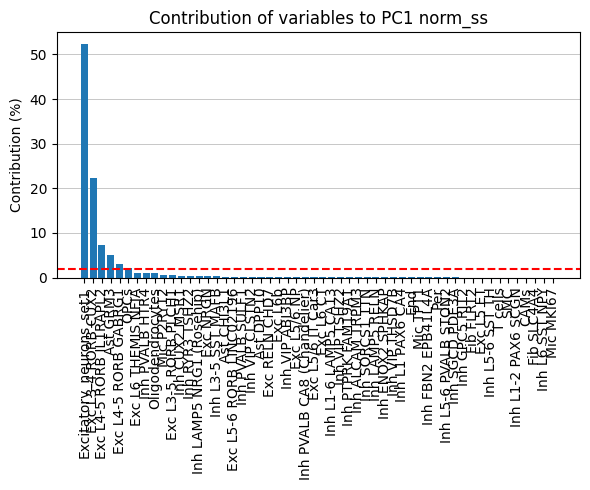

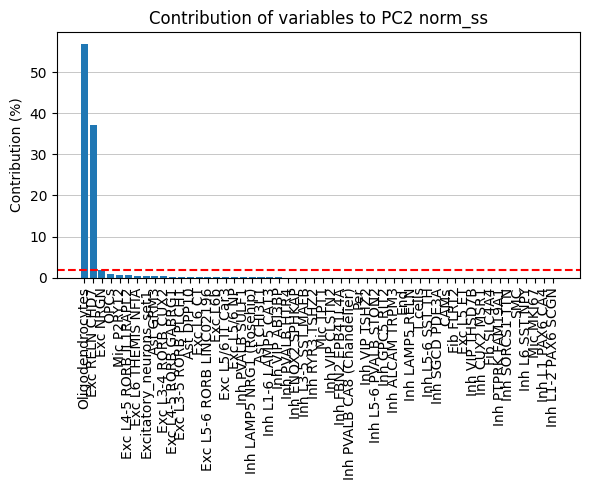

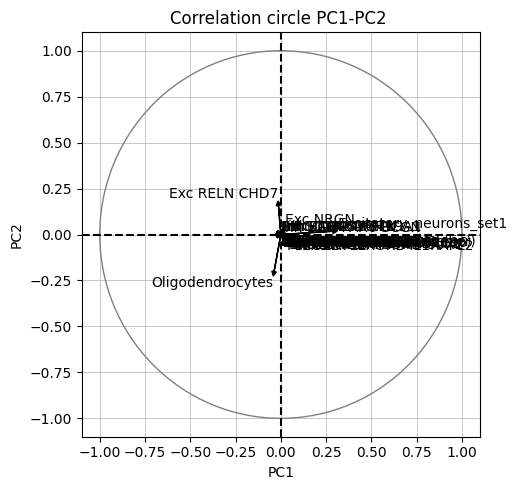

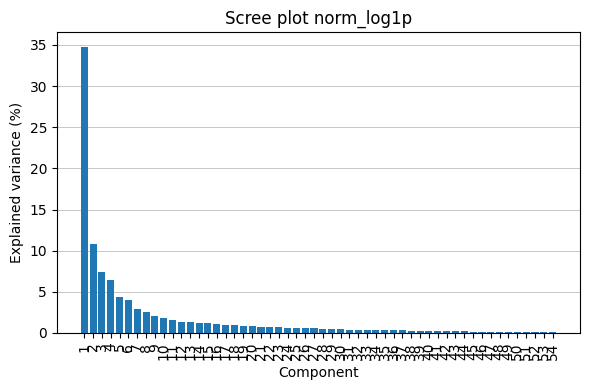

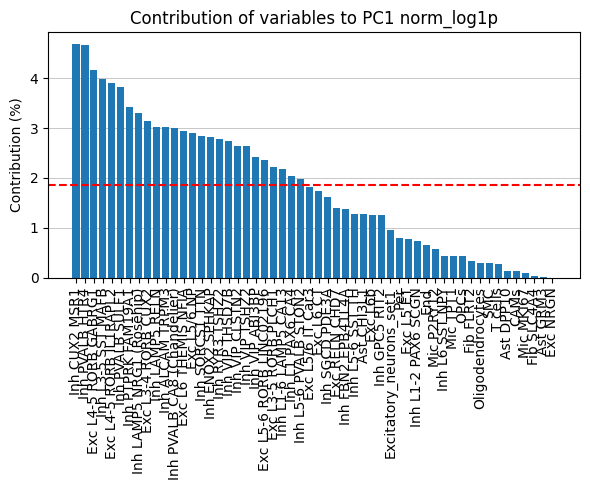

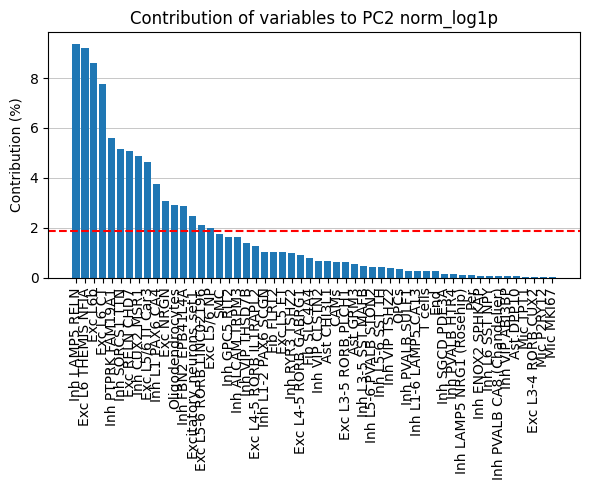

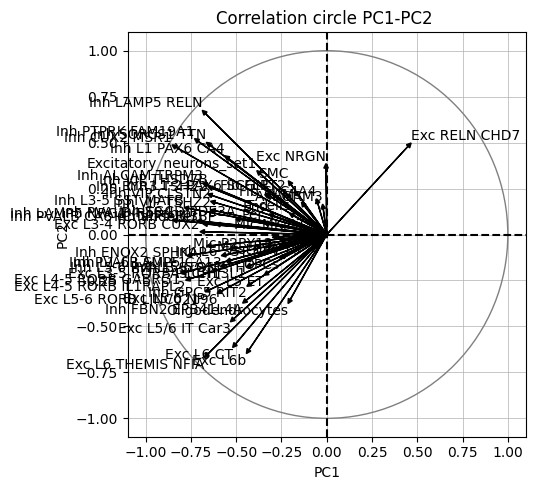

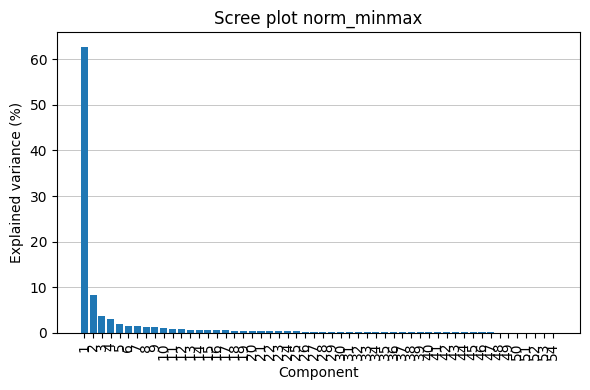

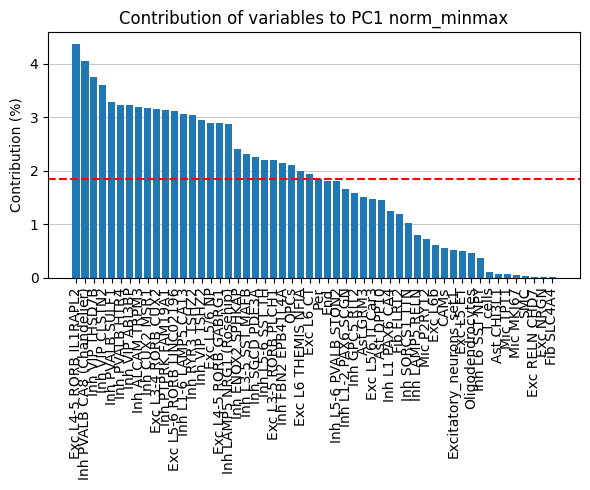

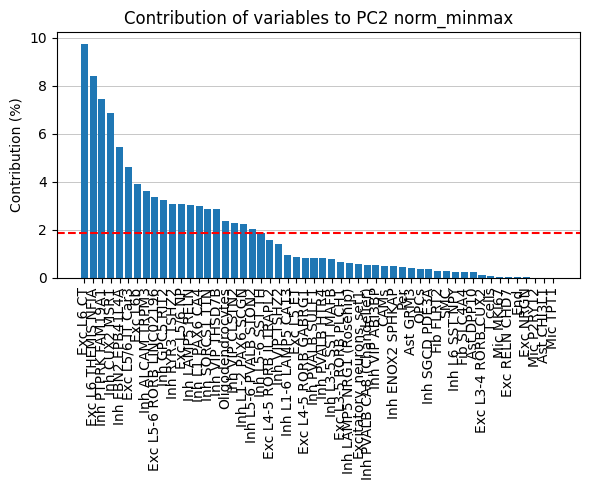

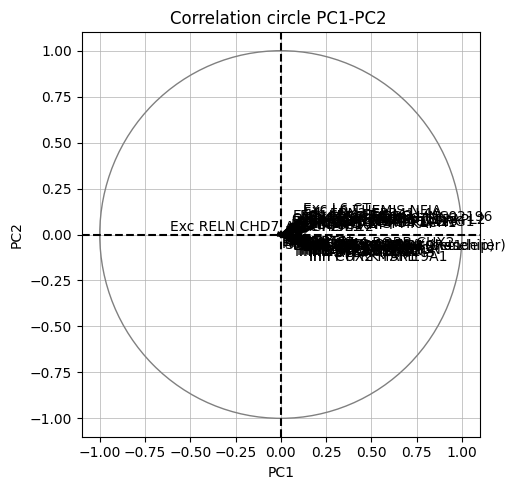

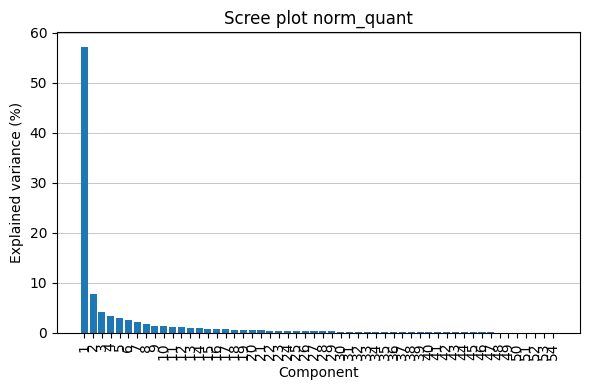

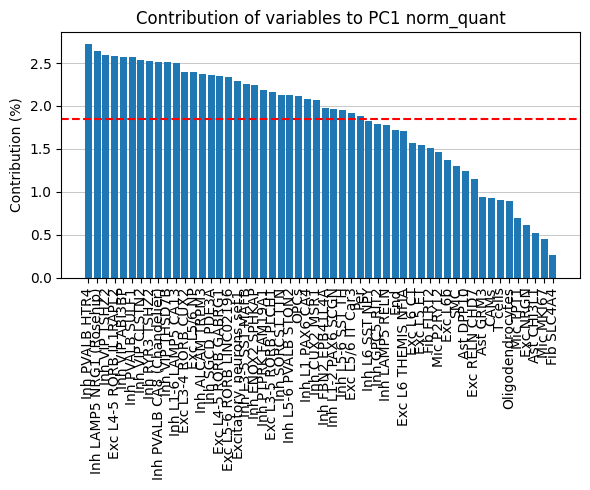

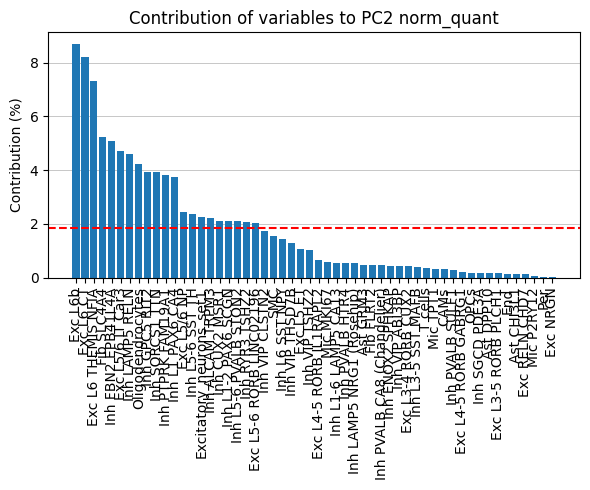

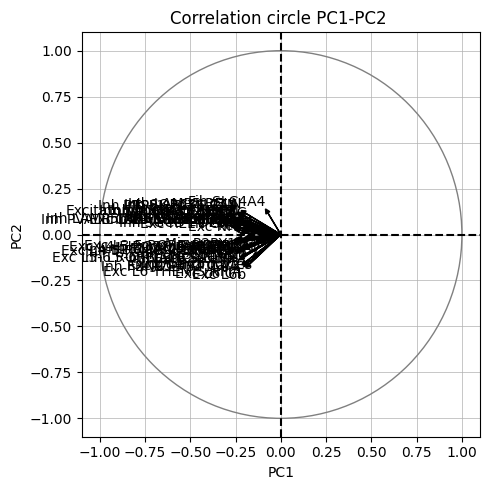

In [2]:
normalizations: list[tuple] = [(normalize_unit, 'norm_ss'), 
                               (normalize_log1p, 'norm_log1p'),
                               (normalize_minmax, 'norm_minmax'), 
                               (normalize_quantile, 'norm_quant')]

col_labels = ct_counts_metadata.var_names
X = StandardScaler().fit_transform(ct_counts_metadata.X)
model = PCA().fit(X)

for func, layer in normalizations:
    # X is the scaled normalized value of adata.X
    func(ct_counts_metadata, layer)  # Normalization/scaling
    X = ct_counts_metadata.layers[layer]

    model = PCA().fit(X)

    pca_screeplot(model, (6, 4), layer)
    pca_contribplot(model, col_labels, comp=0, title_add=layer)
    pca_contribplot(model, col_labels, comp=1, title_add=layer)
    pca_corplot(model, col_labels, comp = [0,1])

In [3]:
# Correlation
# TODO: Figure out how to quantify correlation between healthy and AD patients

from scipy.stats import spearmanr

healthy = pd.DataFrame(ct_counts_metadata.X[ct_counts_metadata.obs['cogdx'] == 1], columns=col_labels).T
alzheimers = pd.DataFrame(ct_counts_metadata.X[(ct_counts_metadata.obs['cogdx'] == 4) | (ct_counts_metadata.obs['cogdx'] == 5)], columns=col_labels).T

display(healthy)
spearman_test = pd.DataFrame(np.zeros(len(col_labels)), index=col_labels, columns=['spearman'])
spearman_test['spearman'] = spearman_test.apply(lambda row: spearmanr(healthy[row.index], alzheimers[row.index]))
spearman_test

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
Ast CHI3L1,14.0,1.0,40.0,9.0,23.0,1.0,1.0,1.0,102.0,0.0,...,4.0,374.0,3.0,1.0,688.0,0.0,17.0,104.0,97.0,2.0
Ast DPP10,58.0,23.0,249.0,229.0,83.0,50.0,73.0,3.0,112.0,15.0,...,67.0,99.0,97.0,15.0,77.0,24.0,70.0,83.0,45.0,30.0
Ast GRM3,492.0,45.0,600.0,406.0,440.0,61.0,324.0,202.0,37.0,77.0,...,34.0,4.0,508.0,256.0,1.0,22.0,201.0,246.0,6.0,66.0
CAMs,2.0,0.0,7.0,15.0,7.0,1.0,1.0,0.0,2.0,15.0,...,5.0,5.0,27.0,4.0,11.0,0.0,4.0,4.0,1.0,1.0
End,11.0,3.0,42.0,27.0,9.0,3.0,20.0,4.0,12.0,3.0,...,13.0,18.0,25.0,29.0,24.0,0.0,10.0,9.0,19.0,4.0
Exc L3-4 RORB CUX2,406.0,66.0,983.0,764.0,312.0,2.0,372.0,343.0,311.0,101.0,...,137.0,178.0,746.0,399.0,777.0,75.0,189.0,511.0,169.0,819.0
Exc L3-5 RORB PLCH1,64.0,55.0,153.0,171.0,66.0,3.0,51.0,60.0,61.0,10.0,...,22.0,181.0,98.0,113.0,142.0,20.0,22.0,82.0,46.0,180.0
Exc L4-5 RORB GABRG1,118.0,110.0,290.0,445.0,423.0,4.0,72.0,145.0,153.0,21.0,...,91.0,268.0,213.0,227.0,366.0,40.0,131.0,182.0,92.0,363.0
Exc L4-5 RORB IL1RAPL2,315.0,175.0,572.0,529.0,274.0,17.0,195.0,138.0,274.0,43.0,...,123.0,793.0,279.0,234.0,553.0,63.0,214.0,254.0,182.0,457.0
Exc L5 ET,8.0,2.0,19.0,15.0,3.0,1.0,18.0,3.0,8.0,3.0,...,1.0,40.0,4.0,9.0,16.0,8.0,4.0,2.0,3.0,17.0


KeyError: "None of [Index(['Ast CHI3L1', 'Ast DPP10', 'Ast GRM3', 'CAMs', 'End',\n       'Exc L3-4 RORB CUX2', 'Exc L3-5 RORB PLCH1', 'Exc L4-5 RORB GABRG1',\n       'Exc L4-5 RORB IL1RAPL2', 'Exc L5 ET', 'Exc L5-6 RORB LINC02196',\n       'Exc L5/6 IT Car3', 'Exc L5/6 NP', 'Exc L6 CT', 'Exc L6 THEMIS NFIA',\n       'Exc L6b', 'Exc NRGN', 'Exc RELN CHD7', 'Excitatory_neurons_set1',\n       'Fib FLRT2', 'Fib SLC4A4', 'Inh ALCAM TRPM3', 'Inh CUX2 MSR1',\n       'Inh ENOX2 SPHKAP', 'Inh FBN2 EPB41L4A', 'Inh GPC5 RIT2',\n       'Inh L1 PAX6 CA4', 'Inh L1-2 PAX6 SCGN', 'Inh L1-6 LAMP5 CA13',\n       'Inh L3-5 SST MAFB', 'Inh L5-6 PVALB STON2', 'Inh L5-6 SST TH',\n       'Inh L6 SST NPY', 'Inh LAMP5 NRG1 (Rosehip)', 'Inh LAMP5 RELN',\n       'Inh PTPRK FAM19A1', 'Inh PVALB CA8 (Chandelier)', 'Inh PVALB HTR4',\n       'Inh PVALB SULF1', 'Inh RYR3 TSHZ2', 'Inh SGCD PDE3A', 'Inh SORCS1 TTN',\n       'Inh VIP ABI3BP', 'Inh VIP CLSTN2', 'Inh VIP THSD7B', 'Inh VIP TSHZ2',\n       'Mic MKI67', 'Mic P2RY12', 'Mic TPT1', 'OPCs', 'Oligodendrocytes',\n       'Per', 'SMC', 'T cells'],\n      dtype='object')] are in the [columns]"